<a href="https://colab.research.google.com/github/mherbert93/DS-Unit-2-Kaggle-Challenge/blob/master/module2-random-forests/LS_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [x] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [x] Continue to participate in our Kaggle challenge.
- [x] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [x] Try Ordinal Encoding.
- [x] Try a Random Forest Classifier.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [x] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [x] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [154]:
train, validation = train_test_split(train, train_size=0.80, test_size=0.20, stratify=train['status_group'], random_state=1337)

train.shape, validation.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
target = 'status_group'

y_train = train[target]
y_validation = validation[target]

In [156]:
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

print("Train dataset baseline accuracy is: ", accuracy_score(y_train, y_pred))

Train dataset baseline accuracy is:  0.5430765993265994


In [157]:
y_pred = [majority_class] * len(y_validation)

print("Validation dataset baseline accuracy is: ", accuracy_score(y_validation, y_pred))

Validation dataset baseline accuracy is:  0.5430976430976431


In [0]:
def wrangle(X): #lets clean our data!
    import numpy as np
    from sklearn.cluster import DBSCAN

    X = X.copy()

    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)

    zero_columns = ['population', 'construction_year'] #columns that contain high amount of 0 and should not
    X['latitude'] = X['latitude'].replace(-2e-08, 0)

    coords = X[['latitude','longitude']]

    #miles_per_radian = 3959
    #epsilon = 1.0 / miles_per_radian
    #db = DBSCAN(eps=epsilon, min_samples=4, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    #cluster_labels = db.labels_

    #X['labels'] = cluster_labels

    for col in zero_columns:
        X[col] = X[col].replace(0, np.nan) #set 0 values to null

    def impute_longitude_by_region(row): #bin null longitude into its respective region. Gives us a slighter better guess.
        if row['longitude'] == 0:
            return (X[(X['region'] == row['region']) & (X['longitude'] != 0)].longitude.mean())
        else:
            return row['longitude']


    def impute_latitude_by_region(row): #bin null latitude into its respective region. Gives us a slighter better guess.
        if row['latitude'] == 0:
            return (X[(X['region'] == row['region']) & (X['latitude'] != 0)].latitude.mean())
        else:
            return row['latitude']

    def impute_gpsheight(row): #bin null gps height into its respective region. Gives us a slighter better guess.
        if (row['gps_height'] == 0) and (row['region'] != 'Mbeya' and row['region'] != 'Kagera'
        and row['region'] != 'Dodoma' and row['region'] != 'Tabora'):
            return (X[(X['region'] == row['region']) & (X['gps_height'] != 0)].gps_height.mean())
        elif row['region'] == 'Mbeya':
            return 1348 #obtained from https://en-us.topographic-map.com/maps/ttgd/Mbeya/
        elif row['region'] == 'Kagera':
            return 1281 #obtained from https://en-us.topographic-map.com/maps/egpg/Kagera/
        elif row['region'] == 'Dodoma':
            return 1143 #obtained from https://en-us.topographic-map.com/maps/e6vm/Dodoma/
        elif row['region'] == 'Tabora':
            return 1177 #obtained from https://elevation.maplogs.com/poi/tabora_region_tanzania.214008.html
        else:
            return row['gps_height']

    X['longitude'] = X.apply(impute_longitude_by_region, axis=1)
    X['latitude'] = X.apply(impute_latitude_by_region, axis=1)

    X['gps_height'] = X.apply(impute_gpsheight, axis=1) #4 regions do not contain any gps height data. We will manually apply an average obtained for each region
                                                        #we will obtain this from https://en-us.topographic-map.com/maps/tlwx/Tanzania/
                                                        #we will go with the assumption that gps_height is in meters.
                                                        #we conclude this because the average gps_height, with zeros removed, is 1021. The average elevation in Tanzania is 936.
                                                        #We can infer based on the similarity in means, that the unit of measurement is meters.

    X['years_old'] = X['date_recorded'].dt.year - X['construction_year'] #how many years since inspection
    X['month_recorded'] = X['date_recorded'].dt.month

    X = X.drop(['quantity_group', 'recorded_by', 'date_recorded', 'wpt_name',
                'subvillage', 'extraction_type_group', 'waterpoint_type_group',
                'source_type', 'quality_group', 'payment_type',
                'management_group', 'extraction_type_class', 'region_code',
                'district_code', 'num_private', 'scheme_name', 'source_class',
                'scheme_management', 'amount_tsh'], axis=1) #drop recorded by as its a constant. drop quantity_group as its a duplicate column.
    return X

In [0]:
train = wrangle(train)
validation = wrangle(validation)
test = wrangle(test)

In [0]:
train_features = train.drop([target, 'id'], axis=1)
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

categorical_features = train_features.select_dtypes(exclude='number').nunique().index.tolist()


features = numeric_features + categorical_features

In [0]:
y_train = train[target]
X_train = train[features]
y_validation = validation[target]
X_validation = validation[features]
X_test = test[features]

In [162]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint, uniform
from sklearn.feature_selection import SelectFromModel


train_pipeline = Pipeline([#('encoder', ce.OneHotEncoder(use_cat_names=True)),
                           ('encoder', ce.OrdinalEncoder()),
                           ('imputer', SimpleImputer(strategy='median')),
                           ('model', RandomForestClassifier(random_state=1337, min_samples_leaf=3, max_features=10))])


param_distributions = {
    'model__n_estimators': randint(50, 500),
    'model__max_depth': [5, 10, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, None],
    'model__max_features': uniform(0, 1),
    'model__min_samples_leaf': randint(1, 20)
 }

grid_distributions = {
    'model__n_estimators': range(50, 300, 50),
    'model__max_depth': range(1, 30),
    'model__max_features': (1, 30),
    'model__min_samples_leaf': range(1, 10)
}

# ### If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    train_pipeline,
    param_distributions=param_distributions,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

#search = GridSearchCV(
#    train_pipeline,
#    param_grid=grid_distributions,
#    cv=3,
#    scoring='accuracy',
#    verbose=10,
#    return_train_score=True,
#    n_jobs=-1
#)

train_pipeline.fit(X_train, y_train)
y_pred = train_pipeline.predict(X_validation)
train_pred = train_pipeline.predict(X_train)
test_pred = train_pipeline.predict(X_test)

#search.fit(X_train, y_train)
#y_pred = search.predict(X_validation)
#train_pred = search.predict(X_train)
#test_pred = search.predict(X_test)

print("Validation accuracy score:", accuracy_score(y_validation, y_pred), "                    Train accuracy is: ", accuracy_score(y_train, train_pred))

Validation accuracy score: 0.8106060606060606                     Train accuracy is:  0.9206018518518518


# WIP: This notebook is not 100% up to date, am doing alot of experimenting locally.

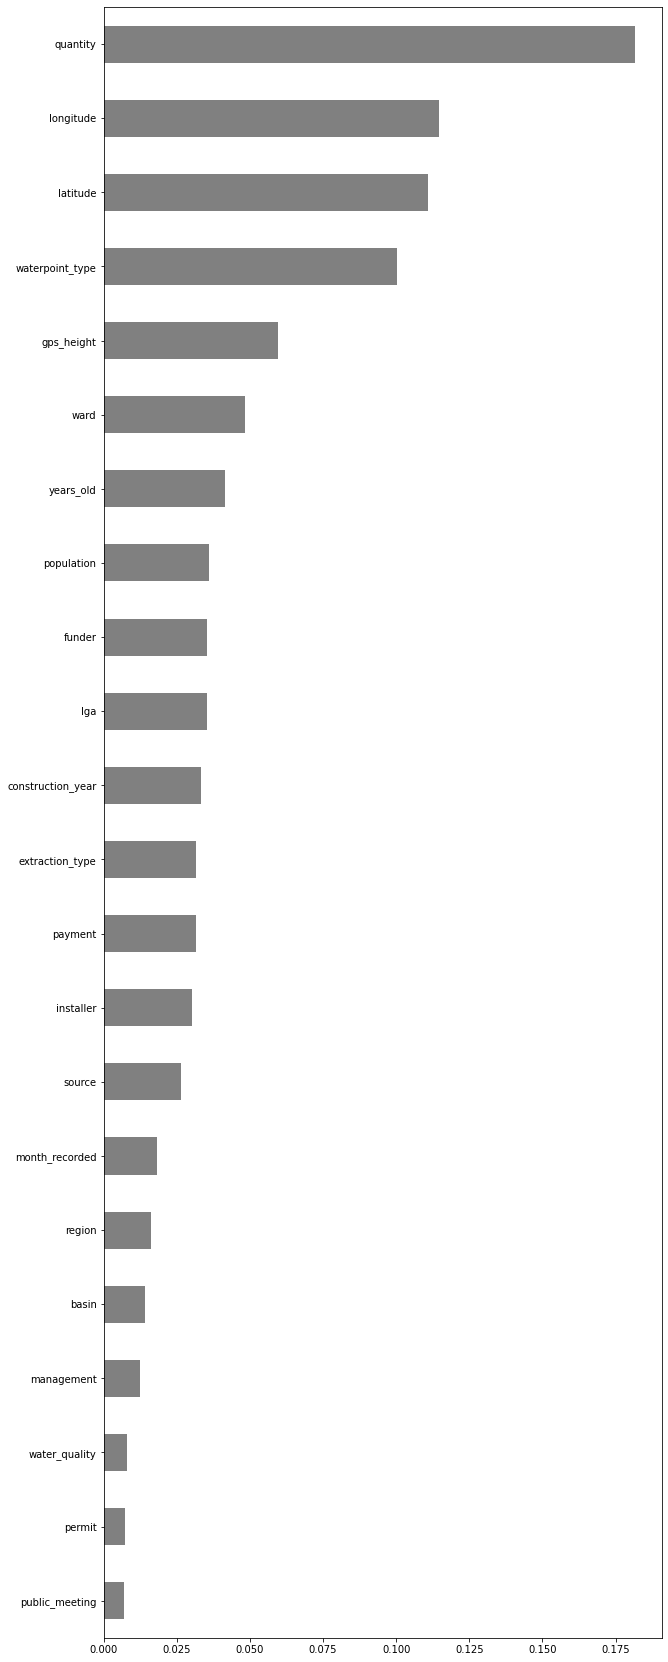

In [163]:
import matplotlib.pyplot as plt


#model = search.best_estimator_.named_steps.model
#encoder = search.best_estimator_.named_steps.encoder

model = train_pipeline.named_steps.model
encoder = train_pipeline.named_steps.encoder


encoded_columns = encoder.transform(X_validation).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='grey');

In [0]:
submission = sample_submission.copy()
submission['status_group'] = test_pred
submission.to_csv('martin-herbert_random_forest_2.csv', index=False)

In [0]:
#search.best_params_

In [0]:
#search.best_estimator_.named_steps.encoder